<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_NLP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd
import zipfile
data = pd.read_csv('drive/MyDrive/ML course 2024/HW 4.1/tweet_sentiment_train.csv.zip')
display(data.head())
display(data.info())
data.dropna(inplace=True)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


None

### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


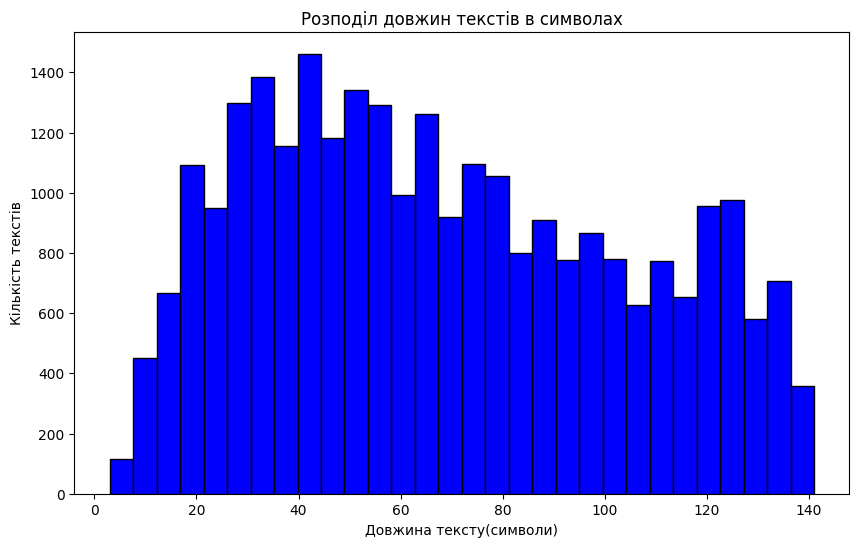

In [ ]:
data['text_length'] = data['text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=30, color='blue', edgecolor='black')
plt.title('Розподіл довжин текстів в символах')
plt.xlabel('Довжина тексту(символи)')
plt.ylabel('Кількість текстів')
plt.show()

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')

english_stopwords = stopwords.words('english')
stemmer = SnowballStemmer(language='english')

# токанізація та стемммінг
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1500)
# отримання векторів
bow_features = vectorizer.fit_transform(data['text'])

print('Размерность матриці BoW:', bow_features.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Размерность матриці BoW: (27480, 1500)


### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Розділення даних і міток
X_bow = bow_features
y = data['sentiment']

# Розділення на навчальний та тестовий набори
train_idx, test_idx = train_test_split(y.index, test_size=0.2, random_state=42)
X_train_bow, X_test_bow = X_bow[train_idx], X_bow[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Навчання моделі на BoW
model_bow = DecisionTreeClassifier()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

# Оцінка моделі
print('Результати для BoW:')
print(classification_report(y_test, y_pred_bow))

Результати для BoW:
              precision    recall  f1-score   support

    negative       0.58      0.57      0.58      1572
     neutral       0.62      0.61      0.62      2236
    positive       0.68      0.70      0.69      1688

    accuracy                           0.63      5496
   macro avg       0.63      0.63      0.63      5496
weighted avg       0.63      0.63      0.63      5496



In [ ]:
# для порівняння використвємо іншу модель

from lightgbm import LGBMClassifier
model_bow = LGBMClassifier()
model_bow.fit(X_train_bow.astype('float32'), y_train)
y_train_pred_bow = model_bow.predict(X_train_bow.astype('float32'))
y_test_pred_bow = model_bow.predict(X_test_bow.astype('float32'))

# Оцінка моделі
print('Результати для train, test BoW:')
print(classification_report(y_train, y_train_pred_bow))
print(classification_report(y_test, y_test_pred_bow))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3143
[LightGBM] [Info] Number of data points in the train set: 21984, number of used features: 1140
[LightGBM] [Info] Start training from score -1.264315
[LightGBM] [Info] Start training from score -0.906401
[LightGBM] [Info] Start training from score -1.159663


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Результати для train, test BoW:
              precision    recall  f1-score   support

    negative       0.80      0.65      0.72      6209
     neutral       0.70      0.81      0.75      8881
    positive       0.81      0.77      0.79      6894

    accuracy                           0.75     21984
   macro avg       0.77      0.74      0.75     21984
weighted avg       0.76      0.75      0.75     21984

              precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1572
     neutral       0.66      0.77      0.71      2236
    positive       0.76      0.76      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.71      0.71      5496
weighted avg       0.72      0.71      0.71      5496



LGBM продемонструвала набагато кращий результат.Обираємо цю модель для подальшого використання

### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?


In [ ]:
importance_df = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'importance': model_bow.feature_importances_})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df.reset_index(drop=True, inplace=True)
importance_df

,feature,importance
0,.,172
1,!,146
2,`,145
3,love,109
4,miss,106
...,...,...
1495,wine,0
1496,--,0
1497,24,0
1498,20,0


In [ ]:
importance_df[:20]

,feature,importance
0,.,172
1,!,146
2,`,145
3,love,109
4,miss,106
5,good,90
6,thank,90
7,",",81
8,sorri,79
9,sad,79


Бачимо , що всі слова виражають букально сентименти, а ось крапку та кому можна прибрати , бо ніяк не впливають на вираження настрою

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ініціалізація векторизатора
vectorizer_tfidf = TfidfVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1500)

# Отримання векторів
tfidf_features = vectorizer_tfidf.fit_transform(data['text'])

# Навчання моделі на TF-IDF
X_train_tfidf, X_test_tfidf = tfidf_features[train_idx], tfidf_features[test_idx]

model_tfidf = LGBMClassifier()
model_tfidf.fit(X_train_tfidf.astype('float32'), y_train)
y_train_pred_tfidf = model_tfidf.predict(X_train_tfidf.astype('float32'))
y_test_pred_tfidf = model_tfidf.predict(X_test_tfidf.astype('float32'))

# Оцінка моделі
print('Результати для train, test tfidf:')
print(classification_report(y_train, y_train_pred_tfidf))
print(classification_report(y_test, y_test_pred_tfidf))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41595
[LightGBM] [Info] Number of data points in the train set: 21984, number of used features: 1140
[LightGBM] [Info] Start training from score -1.264315
[LightGBM] [Info] Start training from score -0.906401
[LightGBM] [Info] Start training from score -1.159663


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Результати для train, test tfidf:
              precision    recall  f1-score   support

    negative       0.81      0.67      0.73      6209
     neutral       0.71      0.82      0.76      8881
    positive       0.82      0.78      0.80      6894

    accuracy                           0.77     21984
   macro avg       0.78      0.76      0.77     21984
weighted avg       0.77      0.77      0.77     21984

              precision    recall  f1-score   support

    negative       0.74      0.59      0.66      1572
     neutral       0.66      0.76      0.71      2236
    positive       0.77      0.75      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.72      0.70      0.71      5496
weighted avg       0.72      0.71      0.71      5496



In [ ]:
print('Результати для train, test BoW:')
print(classification_report(y_train, y_train_pred_bow))
print(classification_report(y_test, y_test_pred_bow))

Результати для train, test BoW:
              precision    recall  f1-score   support

    negative       0.80      0.65      0.72      6209
     neutral       0.70      0.81      0.75      8881
    positive       0.81      0.77      0.79      6894

    accuracy                           0.75     21984
   macro avg       0.77      0.74      0.75     21984
weighted avg       0.76      0.75      0.75     21984

              precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1572
     neutral       0.66      0.77      0.71      2236
    positive       0.76      0.76      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.71      0.71      5496
weighted avg       0.72      0.71      0.71      5496



Якість класифікації сильно не змінилась. Поглянемо на важливість ознак.

In [ ]:
importance_tfidf = pd.DataFrame({'feature': vectorizer_tfidf.get_feature_names_out(), 'importance': model_tfidf.feature_importances_})
importance_tfidf.sort_values(by='importance', ascending=False, inplace=True)
importance_tfidf.reset_index(drop=True, inplace=True)
importance_tfidf

,feature,importance
0,`,135
1,love,118
2,good,102
3,miss,102
4,thank,101
...,...,...
1495,2nd,0
1496,woot,0
1497,1,0
1498,100,0


In [ ]:
importance_tfidf[:20]

,feature,importance
0,`,135
1,love,118
2,good,102
3,miss,102
4,thank,101
5,great,90
6,sorri,89
7,!,86
8,hope,86
9,sad,85


Понизилась важливість крапки і коми. Найважливіші слова лишились ті самі.

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

In [ ]:
y_test_pred_tfidf_proba = model_tfidf.predict_proba(X_test_tfidf.astype('float32'))

print(y_test_pred_tfidf_proba[:5])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[0.04014959 0.13037894 0.82947146]
 [0.11565401 0.76324225 0.12110374]
 [0.11812775 0.7766024  0.10526985]
 [0.02982933 0.36428914 0.60588153]
 [0.20423657 0.66081435 0.13494909]]


In [ ]:
y_test_pred_tfidf_proba.reshape(-1,1,3)

array([[[0.04014959, 0.13037894, 0.82947146]],

       [[0.11565401, 0.76324225, 0.12110374]],

       [[0.11812775, 0.7766024 , 0.10526985]],

       ...,

       [[0.20156046, 0.69448459, 0.10395494]],

       [[0.35508194, 0.49374352, 0.15117454]],

       [[0.2517059 , 0.55924144, 0.18905266]]])

In [ ]:
errors_df = pd.DataFrame({
    'text': data['text'].iloc[test_idx],
    'y_test': y_test,
    'y_pred_bow': y_test_pred_bow,
    'y_pred_tfidf': y_test_pred_tfidf,
    })

# додаю ймовірності належності до класів
errors_df['y_test_pred_tfidf_proba'] = y_test_pred_tfidf_proba.tolist()
y_test_pred_tfidf_proba = model_tfidf.predict_proba(X_test_tfidf.astype('float32')).round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
errors_df[errors_df.y_test!=errors_df.y_pred_tfidf]

,text,y_test,y_pred_bow,y_pred_tfidf,y_test_pred_tfidf_proba
10413,--of them kinda turns me off of it all. And ...,negative,neutral,neutral,"[0.11565401233784332, 0.7632422465092373, 0.12..."
579,OHSHNAPSSS. is she pissed at blair as usual ?...,neutral,neutral,negative,"[0.567179097332021, 0.26019994355634096, 0.172..."
5117,Doing really well! I will stay here as long a...,positive,neutral,neutral,"[0.2150009580124859, 0.4088101984815687, 0.376..."
6717,At work... What a miserable day,negative,neutral,neutral,"[0.09793959775857906, 0.8325238776561993, 0.06..."
2830,I wish I had company,negative,positive,positive,"[0.11951828223712772, 0.34865609296619166, 0.5..."
...,...,...,...,...,...
17991,I GOT IT! i hope i get off of work in time fo...,neutral,neutral,positive,"[0.07568129182940077, 0.36378488851801377, 0.5..."
5421,*hugs* listening to EBTG 'Each & Every One' p...,neutral,positive,positive,"[0.0927889179770589, 0.2054407761571437, 0.701..."
8482,had a 100% raw day,negative,neutral,neutral,"[0.17554863985727354, 0.6515836728172248, 0.17..."
18630,FCKeditor is giving me problems! Posts just fi...,negative,positive,positive,"[0.34636707246193377, 0.3025916621578962, 0.35..."


Помилки визначення настрою
1.Текст з індексом 5117

2.Текст з індексом 2830

3.Текст з індексом 3277

І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model